# Title Race Analysis - Israeli Premier League
## ניתוח מרוץ האליפות - ליגת העל

This notebook analyzes leadership changes throughout the season in the Israeli Premier League from 2006/07 to 2024/25.

## 1. Environment Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

# Support Hebrew text in plots
plt.rcParams['font.family'] = 'DejaVu Sans'

# Helper to find project root
def _find_root(start=None):
    p = start or Path.cwd()
    for _ in range(6):
        if (p / 'data').exists() or (p / '.git').exists() or (p / 'notebooks').exists():
            return p
        p = p.parent
    return Path.cwd()

# Setup paths
ROOT = _find_root()
INTERIM_DIR = ROOT / 'data' / 'interim'
FIG_DIR = ROOT / 'reports' / 'figures'
FIG_DIR.mkdir(parents=True, exist_ok=True)

print(f"✅ Environment setup complete")
print(f"   ROOT: {ROOT}")
print(f"   INTERIM_DIR: {INTERIM_DIR}")
print(f"   FIG_DIR: {FIG_DIR}")

✅ Environment setup complete
   ROOT: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks
   INTERIM_DIR: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\data\interim
   FIG_DIR: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\reports\figures


## 2. Load Data

In [10]:
# Load the per-round data (round-by-round leadership)
per_round_df = pd.read_csv(INTERIM_DIR / 'tm_title_race_per_round.csv')

# Load the summary data (leadership changes per season)
summary_df = pd.read_csv(INTERIM_DIR / 'tm_title_race_summary_all_seasons.csv')

# Load playoff data
playoff_summary_df = pd.read_csv(INTERIM_DIR / 'playoff_championship_leadership_changes.csv')
playoff_per_round_df = pd.read_csv(INTERIM_DIR / 'playoff_championship_per_round.csv')

print(f"✅ Loaded data successfully:")
print(f"   Regular season per-round: {len(per_round_df)} rows, {per_round_df['season'].nunique()} seasons")
print(f"   Regular season summary: {len(summary_df)} seasons")
print(f"   Playoff summary: {len(playoff_summary_df)} seasons")
print(f"   Playoff per-round: {len(playoff_per_round_df)} rows")

# Display summary
print(f"\n📊 Season range: {summary_df['season'].min()} to {summary_df['season'].max()}")
display(summary_df.head(10))

✅ Loaded data successfully:
   Regular season per-round: 538 rows, 20 seasons
   Regular season summary: 20 seasons
   Playoff summary: 16 seasons
   Playoff per-round: 163 rows

📊 Season range: 2006/07 to 2025/26


,season,leadership_changes,first_leader,last_leader,last_round,distinct_leaders
0,2006/07,5,H. Kfar Saba,B. Jerusalem,33,4
1,2007/08,0,B. Jerusalem,B. Jerusalem,33,1
2,2008/09,8,Maccabi Haifa,Maccabi Haifa,33,3
3,2009/10,1,Bnei Yehuda,Maccabi Haifa,30,2
4,2010/11,12,Maccabi Netanya,Maccabi Haifa,30,6
5,2011/12,7,Hapoel Tel Aviv,Kiryat Shmona,30,3
6,2012/13,7,FC Ashdod,M. Tel Aviv,26,3
7,2013/14,2,Maccabi Haifa,M. Tel Aviv,26,3
8,2014/15,7,Hapoel Raanana,M. Tel Aviv,26,3
9,2015/16,5,Bnei Yehuda,H. Beer Sheva,26,4


## 3. Analysis: Leadership Stability Metrics

### 3.1. How Many Rounds Each Team Led Per Season (יציבות הובלה)

📊 Top 3 teams by rounds led per season:

2006/07:
  B. Jerusalem: 29 rounds
  H. Kfar Saba: 2 rounds
  Hapoel Tel Aviv: 1 rounds

2007/08:
  B. Jerusalem: 33 rounds

2008/09:
  Maccabi Haifa: 26 rounds
  Maccabi Netanya: 5 rounds
  Hapoel Tel Aviv: 2 rounds

2009/10:
  Maccabi Haifa: 28 rounds
  Bnei Yehuda: 2 rounds

2010/11:
  Maccabi Haifa: 16 rounds
  Kiryat Shmona: 7 rounds
  Hapoel Tel Aviv: 3 rounds

2011/12:
  Kiryat Shmona: 16 rounds
  Hapoel Tel Aviv: 8 rounds
  M. Tel Aviv: 6 rounds

2012/13:
  M. Tel Aviv: 17 rounds
  FC Ashdod: 8 rounds
  Hapoel Tel Aviv: 1 rounds

2013/14:
  M. Tel Aviv: 24 rounds
  H. Beer Sheva: 1 rounds
  Maccabi Haifa: 1 rounds

2014/15:
  M. Tel Aviv: 15 rounds
  Kiryat Shmona: 10 rounds
  Hapoel Raanana: 1 rounds

2015/16:
  H. Beer Sheva: 15 rounds
  M. Tel Aviv: 6 rounds
  M. Petah Tikva: 4 rounds

💾 Saved: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\reports\figures\rounds_led_heatmap.png
💾 Saved: c:\Users\nitib\dev-lab\

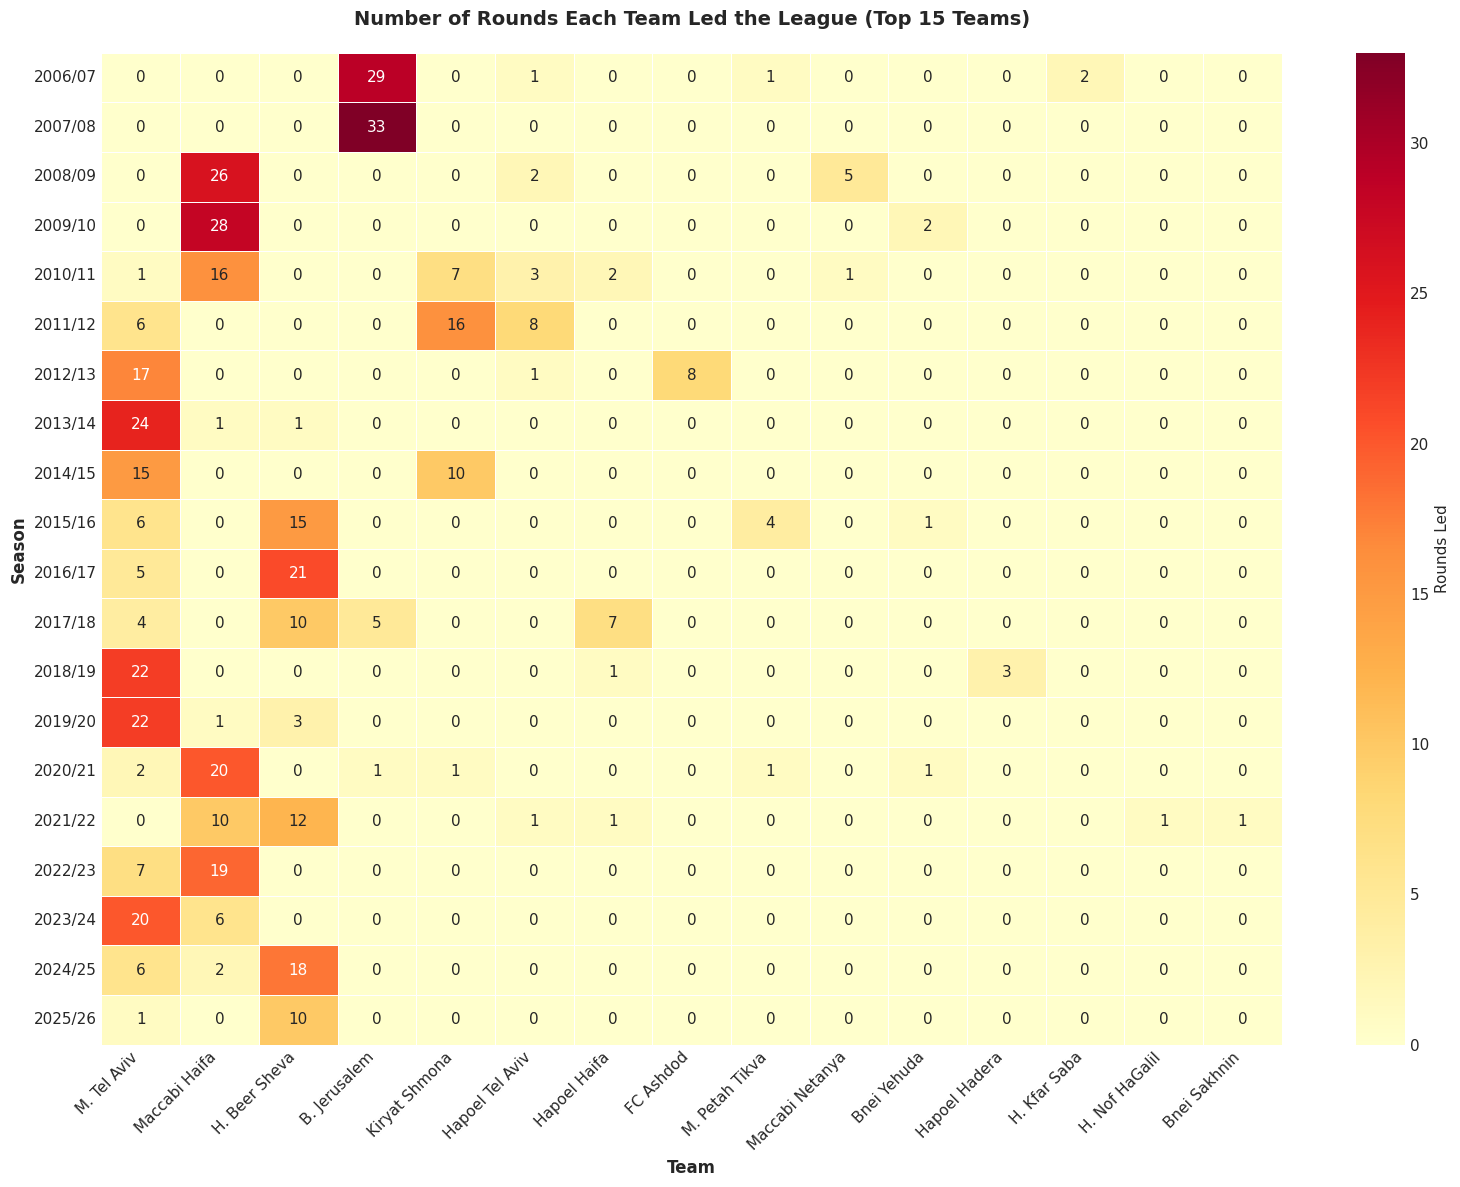


📋 Total Rounds Led Across All Seasons (Top 10):


,Team,Total Rounds Led
0,M. Tel Aviv,158
1,Maccabi Haifa,129
2,H. Beer Sheva,90
3,B. Jerusalem,68
4,Kiryat Shmona,34
5,Hapoel Tel Aviv,16
6,Hapoel Haifa,11
7,FC Ashdod,8
8,Maccabi Netanya,6
9,M. Petah Tikva,6


In [11]:
# Calculate how many rounds each team led in each season
rounds_led = per_round_df.groupby(['season', 'leader']).size().reset_index(name='rounds_led')

# Create pivot table for visualization
rounds_led_pivot = rounds_led.pivot(index='season', columns='leader', values='rounds_led').fillna(0)

# Display top leaders per season
print("📊 Top 3 teams by rounds led per season:\n")
for season in summary_df['season'].head(10):
    season_data = rounds_led[rounds_led['season'] == season].sort_values('rounds_led', ascending=False).head(3)
    print(f"{season}:")
    for _, row in season_data.iterrows():
        print(f"  {row['leader']}: {int(row['rounds_led'])} rounds")
    print()

# Create visualization - heatmap of rounds led
fig, ax = plt.subplots(figsize=(16, 12))

# Select top teams by total rounds led across all seasons
top_teams = rounds_led.groupby('leader')['rounds_led'].sum().sort_values(ascending=False).head(15).index
rounds_led_top = rounds_led[rounds_led['leader'].isin(top_teams)]
rounds_led_pivot_top = rounds_led_top.pivot(index='season', columns='leader', values='rounds_led').fillna(0)

# Sort columns by total rounds led
col_order = rounds_led_pivot_top.sum().sort_values(ascending=False).index
rounds_led_pivot_top = rounds_led_pivot_top[col_order]

sns.heatmap(rounds_led_pivot_top, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': 'Rounds Led'}, linewidths=0.5, ax=ax)
ax.set_title('Number of Rounds Each Team Led the League (Top 15 Teams)', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Team', fontsize=12, fontweight='bold')
ax.set_ylabel('Season', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save figure
fig_path = FIG_DIR / 'rounds_led_heatmap.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"💾 Saved: {fig_path}")

plt.show()

# Summary table - total rounds led by each team across all seasons
total_rounds_led = rounds_led.groupby('leader')['rounds_led'].sum().sort_values(ascending=False).reset_index()
total_rounds_led.columns = ['Team', 'Total Rounds Led']
print("\n📋 Total Rounds Led Across All Seasons (Top 10):")
display(total_rounds_led.head(10))

### 3.2. Leadership Changes Per Season (חילופי הובלה)

💾 Saved: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\reports\figures\leadership_changes_per_season.png


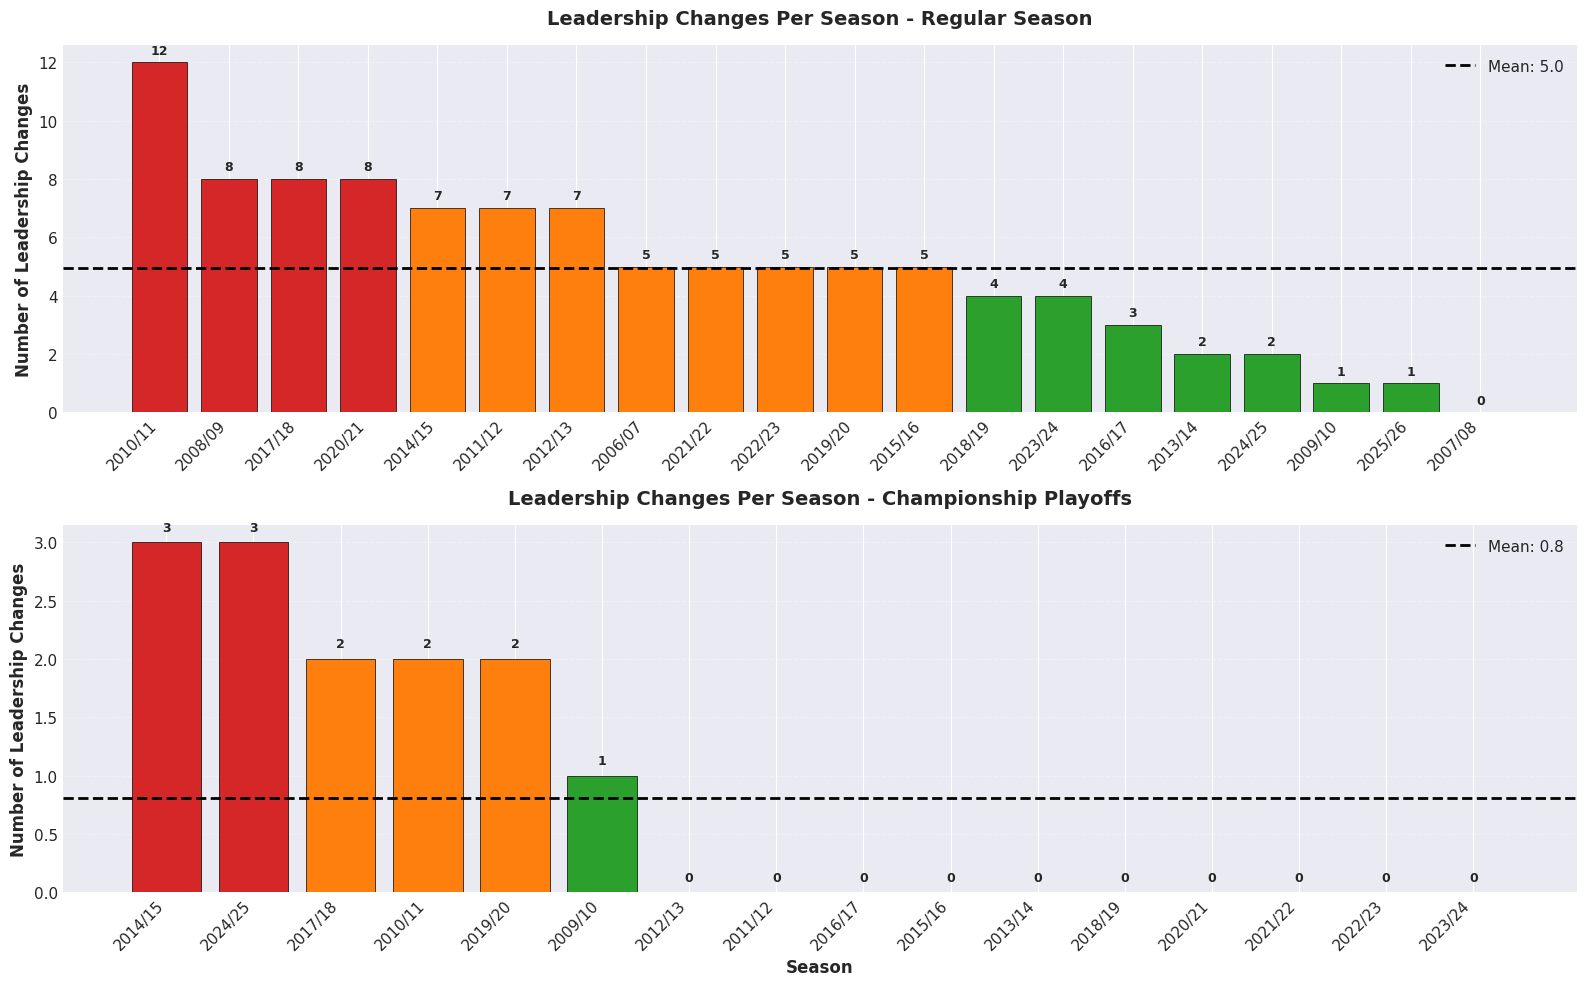


📊 Leadership Changes Statistics:



,Phase,Mean,Median,Min,Max,Std Dev
0,Regular Season,4.9500,5.0,0,12,2.981963
1,Championship Playoffs,0.8125,0.0,0,3,1.167262



🏆 Most Competitive Seasons (Regular):


,season,leadership_changes,distinct_leaders
4,2010/11,12,6
2,2008/09,8,3
11,2017/18,8,4
14,2020/21,8,6
5,2011/12,7,3



😴 Most Stable Seasons (Regular):


,season,leadership_changes,distinct_leaders
1,2007/08,0,1
3,2009/10,1,2
19,2025/26,1,2
7,2013/14,2,3
18,2024/25,2,3


In [12]:
# Visualization: Leadership changes per season
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Regular season
ax1 = axes[0]
summary_sorted = summary_df.sort_values('leadership_changes', ascending=False)
colors = ['#d62728' if x >= 8 else '#ff7f0e' if x >= 5 else '#2ca02c' for x in summary_sorted['leadership_changes']]

ax1.bar(range(len(summary_sorted)), summary_sorted['leadership_changes'], color=colors, edgecolor='black', linewidth=0.5)
ax1.set_xticks(range(len(summary_sorted)))
ax1.set_xticklabels(summary_sorted['season'], rotation=45, ha='right')
ax1.set_ylabel('Number of Leadership Changes', fontsize=12, fontweight='bold')
ax1.set_title('Leadership Changes Per Season - Regular Season', fontsize=14, fontweight='bold', pad=15)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.axhline(summary_sorted['leadership_changes'].mean(), color='black', linestyle='--', linewidth=2, label=f"Mean: {summary_sorted['leadership_changes'].mean():.1f}")
ax1.legend()

# Add value labels on bars
for i, v in enumerate(summary_sorted['leadership_changes']):
    ax1.text(i, v + 0.3, str(int(v)), ha='center', fontsize=9, fontweight='bold')

# Playoff comparison
ax2 = axes[1]
playoff_sorted = playoff_summary_df.sort_values('playoff_leadership_changes', ascending=False)
colors_playoff = ['#d62728' if x >= 3 else '#ff7f0e' if x >= 2 else '#2ca02c' for x in playoff_sorted['playoff_leadership_changes']]

ax2.bar(range(len(playoff_sorted)), playoff_sorted['playoff_leadership_changes'], color=colors_playoff, edgecolor='black', linewidth=0.5)
ax2.set_xticks(range(len(playoff_sorted)))
ax2.set_xticklabels(playoff_sorted['season'], rotation=45, ha='right')
ax2.set_ylabel('Number of Leadership Changes', fontsize=12, fontweight='bold')
ax2.set_xlabel('Season', fontsize=12, fontweight='bold')
ax2.set_title('Leadership Changes Per Season - Championship Playoffs', fontsize=14, fontweight='bold', pad=15)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.axhline(playoff_sorted['playoff_leadership_changes'].mean(), color='black', linestyle='--', linewidth=2, label=f"Mean: {playoff_sorted['playoff_leadership_changes'].mean():.1f}")
ax2.legend()

# Add value labels on bars
for i, v in enumerate(playoff_sorted['playoff_leadership_changes']):
    ax2.text(i, v + 0.1, str(int(v)), ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
fig_path = FIG_DIR / 'leadership_changes_per_season.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"💾 Saved: {fig_path}")
plt.show()

# Summary statistics table
print("\n📊 Leadership Changes Statistics:\n")
stats_table = pd.DataFrame({
    'Phase': ['Regular Season', 'Championship Playoffs'],
    'Mean': [summary_df['leadership_changes'].mean(), playoff_summary_df['playoff_leadership_changes'].mean()],
    'Median': [summary_df['leadership_changes'].median(), playoff_summary_df['playoff_leadership_changes'].median()],
    'Min': [summary_df['leadership_changes'].min(), playoff_summary_df['playoff_leadership_changes'].min()],
    'Max': [summary_df['leadership_changes'].max(), playoff_summary_df['playoff_leadership_changes'].max()],
    'Std Dev': [summary_df['leadership_changes'].std(), playoff_summary_df['playoff_leadership_changes'].std()],
})
display(stats_table)

print("\n🏆 Most Competitive Seasons (Regular):")
display(summary_df.nlargest(5, 'leadership_changes')[['season', 'leadership_changes', 'distinct_leaders']])

print("\n😴 Most Stable Seasons (Regular):")
display(summary_df.nsmallest(5, 'leadership_changes')[['season', 'leadership_changes', 'distinct_leaders']])

### 3.3. Number of Different Teams That Led Each Season (מגוון המובילים)

💾 Saved: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\reports\figures\distinct_leaders_per_season.png


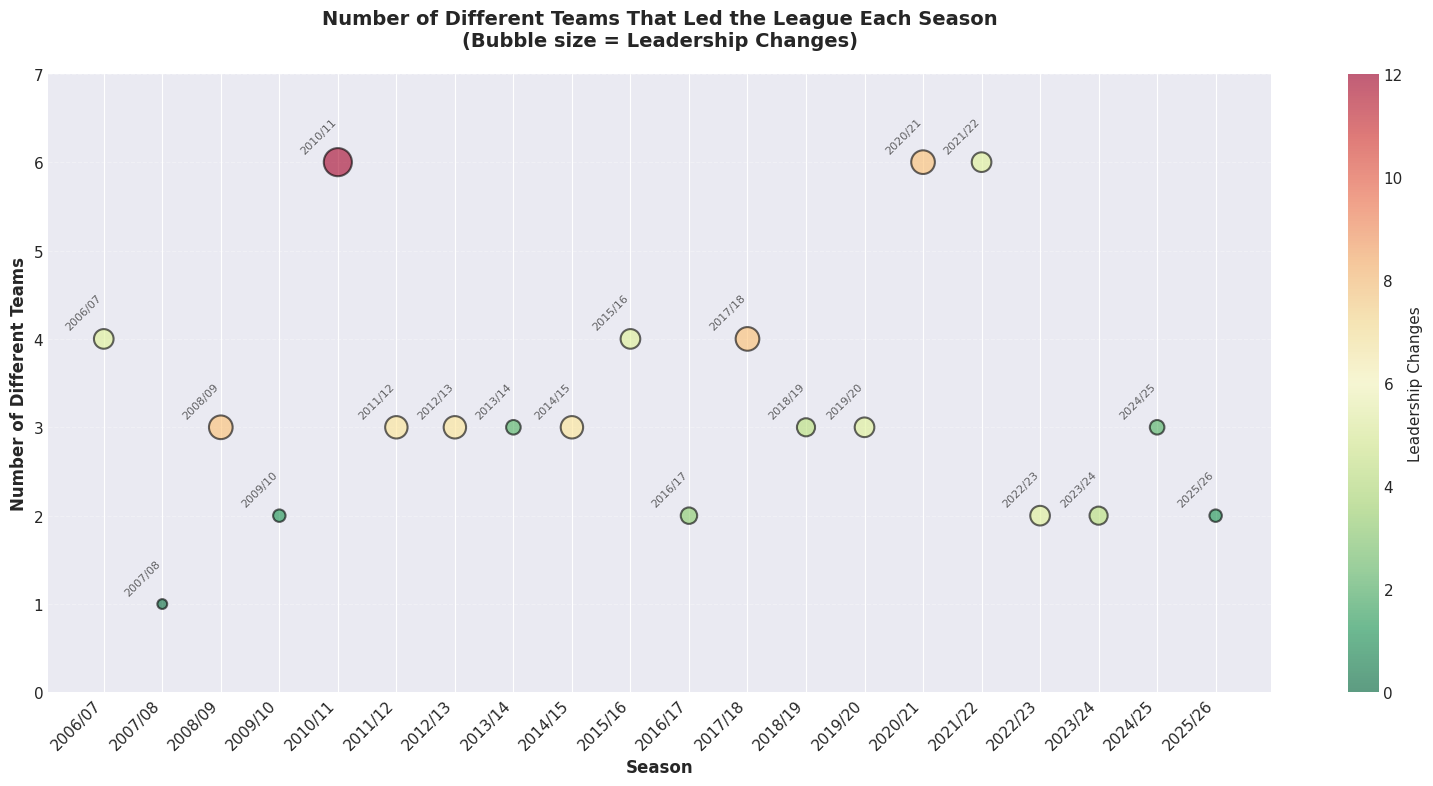


📊 Season Competitiveness Metrics:


,season,leadership_changes,distinct_leaders,first_leader,last_leader,same_leader
0,2006/07,5,4,H. Kfar Saba,B. Jerusalem,False
1,2007/08,0,1,B. Jerusalem,B. Jerusalem,True
2,2008/09,8,3,Maccabi Haifa,Maccabi Haifa,True
3,2009/10,1,2,Bnei Yehuda,Maccabi Haifa,False
4,2010/11,12,6,Maccabi Netanya,Maccabi Haifa,False
5,2011/12,7,3,Hapoel Tel Aviv,Kiryat Shmona,False
6,2012/13,7,3,FC Ashdod,M. Tel Aviv,False
7,2013/14,2,3,Maccabi Haifa,M. Tel Aviv,False
8,2014/15,7,3,Hapoel Raanana,M. Tel Aviv,False
9,2015/16,5,4,Bnei Yehuda,H. Beer Sheva,False



📈 Distribution of Distinct Leaders:
  1 different teams: 1 seasons (5.0%)
  2 different teams: 5 seasons (25.0%)
  3 different teams: 8 seasons (40.0%)
  4 different teams: 3 seasons (15.0%)
  6 different teams: 3 seasons (15.0%)

🎯 Correlation between Leadership Changes and Distinct Leaders:
  Correlation coefficient: 0.679


In [13]:
# Visualization: Distinct leaders per season
fig, ax = plt.subplots(figsize=(16, 8))

# Create scatter plot with size based on leadership changes
scatter = ax.scatter(range(len(summary_df)), summary_df['distinct_leaders'], 
                     s=summary_df['leadership_changes']*30 + 50,
                     c=summary_df['leadership_changes'], cmap='RdYlGn_r',
                     alpha=0.6, edgecolors='black', linewidth=1.5)

# Add season labels
for i, row in summary_df.iterrows():
    ax.text(i, row['distinct_leaders'] + 0.1, row['season'], 
            rotation=45, ha='right', fontsize=8, alpha=0.7)

ax.set_xticks(range(len(summary_df)))
ax.set_xticklabels(summary_df['season'], rotation=45, ha='right')
ax.set_ylabel('Number of Different Teams', fontsize=12, fontweight='bold')
ax.set_xlabel('Season', fontsize=12, fontweight='bold')
ax.set_title('Number of Different Teams That Led the League Each Season\n(Bubble size = Leadership Changes)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, summary_df['distinct_leaders'].max() + 1)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, label='Leadership Changes')

plt.tight_layout()
fig_path = FIG_DIR / 'distinct_leaders_per_season.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"💾 Saved: {fig_path}")
plt.show()

# Create combined table
combined_metrics = summary_df[['season', 'leadership_changes', 'distinct_leaders', 'first_leader', 'last_leader']].copy()
combined_metrics['same_leader'] = combined_metrics['first_leader'] == combined_metrics['last_leader']

print("\n📊 Season Competitiveness Metrics:")
display(combined_metrics)

# Distribution analysis
print("\n📈 Distribution of Distinct Leaders:")
distinct_distribution = summary_df['distinct_leaders'].value_counts().sort_index()
for leaders, count in distinct_distribution.items():
    pct = (count / len(summary_df)) * 100
    print(f"  {int(leaders)} different teams: {count} seasons ({pct:.1f}%)")

print("\n🎯 Correlation between Leadership Changes and Distinct Leaders:")
correlation = summary_df[['leadership_changes', 'distinct_leaders']].corr()
print(f"  Correlation coefficient: {correlation.iloc[0, 1]:.3f}")

### 3.4. Percentage of Rounds with Leadership Change (אחוז חילופי מקום ראשון)

💾 Saved: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\reports\figures\leadership_change_percentage.png


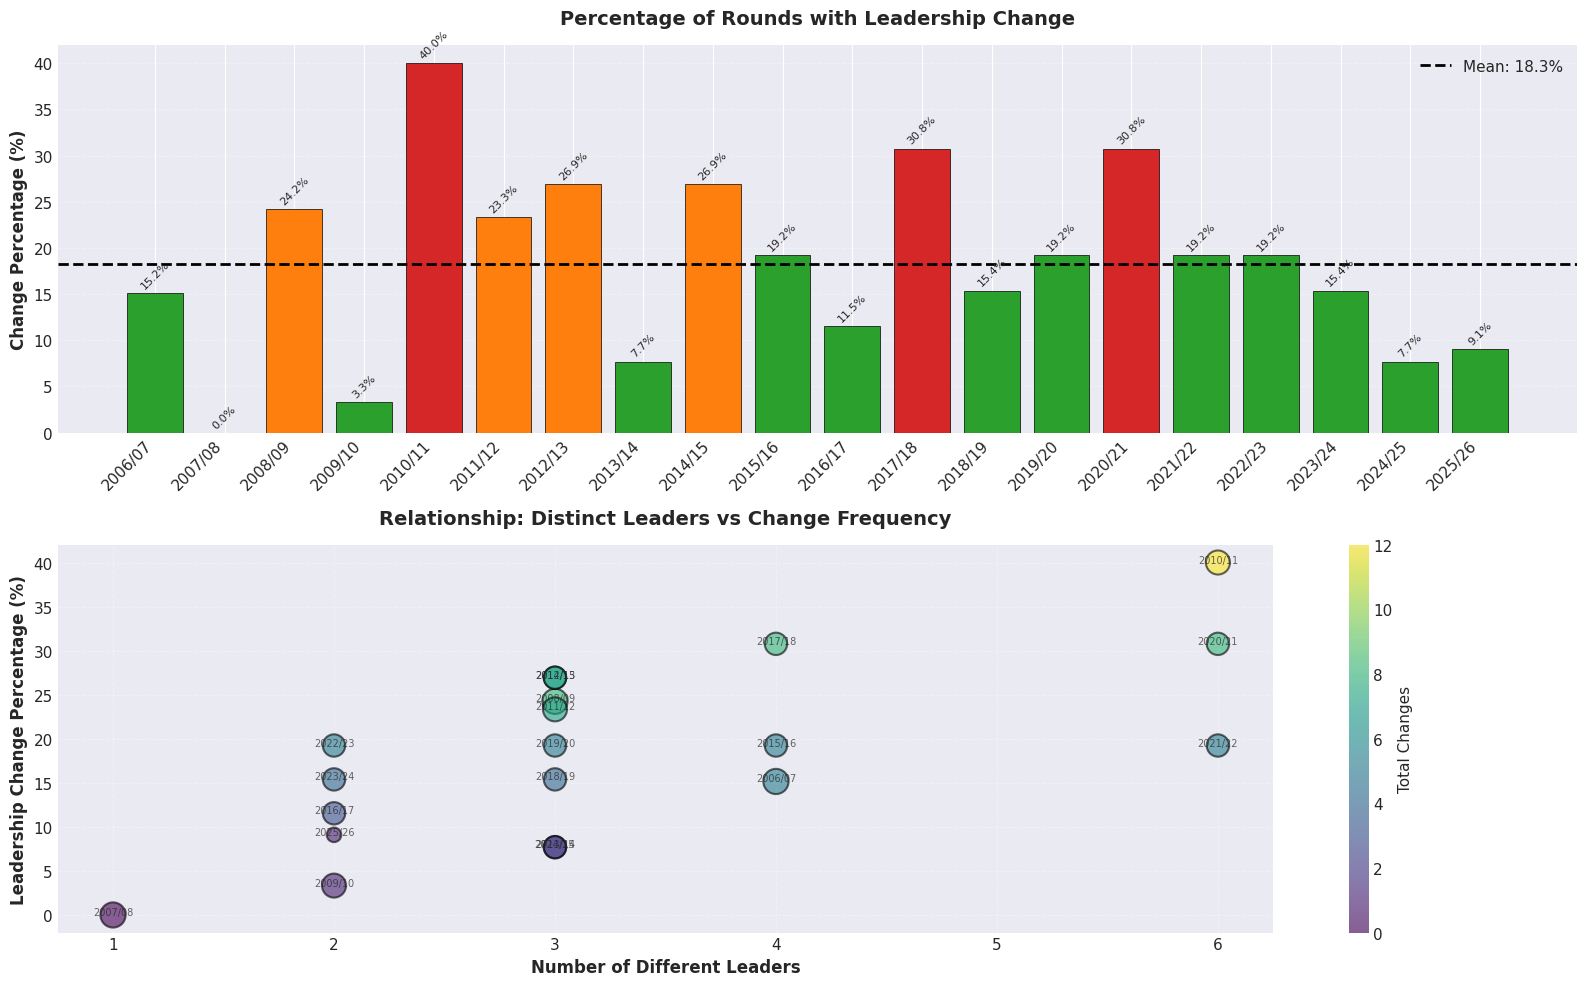


📊 Seasons by Leadership Change Frequency:

Most Dynamic (highest change %):


,season,leadership_changes,last_round,change_percentage,distinct_leaders
4,2010/11,12,30,40.000000,6
11,2017/18,8,26,30.769231,4
14,2020/21,8,26,30.769231,6
8,2014/15,7,26,26.923077,3
6,2012/13,7,26,26.923077,3



Most Stable (lowest change %):


,season,leadership_changes,last_round,change_percentage,distinct_leaders
19,2025/26,1,11,9.090909,2
7,2013/14,2,26,7.692308,3
18,2024/25,2,26,7.692308,3
3,2009/10,1,30,3.333333,2
1,2007/08,0,33,0.000000,1



📈 Overall Statistics:
  Mean change percentage: 18.26%
  Median change percentage: 19.23%
  Std deviation: 10.09%
  Range: 0.00% - 40.00%


In [14]:
# Calculate percentage of rounds with leadership change
summary_df['change_percentage'] = (summary_df['leadership_changes'] / summary_df['last_round']) * 100

# Visualization: Change percentage per season
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Bar chart
ax1 = axes[0]
colors = ['#d62728' if x >= 30 else '#ff7f0e' if x >= 20 else '#2ca02c' for x in summary_df['change_percentage']]
ax1.bar(range(len(summary_df)), summary_df['change_percentage'], color=colors, edgecolor='black', linewidth=0.5)
ax1.set_xticks(range(len(summary_df)))
ax1.set_xticklabels(summary_df['season'], rotation=45, ha='right')
ax1.set_ylabel('Change Percentage (%)', fontsize=12, fontweight='bold')
ax1.set_title('Percentage of Rounds with Leadership Change', fontsize=14, fontweight='bold', pad=15)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.axhline(summary_df['change_percentage'].mean(), color='black', linestyle='--', linewidth=2, 
            label=f"Mean: {summary_df['change_percentage'].mean():.1f}%")
ax1.legend()

# Add value labels
for i, v in enumerate(summary_df['change_percentage']):
    ax1.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=8, rotation=45)

# Scatter plot: Change % vs Distinct Leaders
ax2 = axes[1]
scatter = ax2.scatter(summary_df['distinct_leaders'], summary_df['change_percentage'],
                     s=summary_df['last_round']*10, alpha=0.6, 
                     c=summary_df['leadership_changes'], cmap='viridis',
                     edgecolors='black', linewidth=1.5)

# Add season labels
for _, row in summary_df.iterrows():
    ax2.annotate(row['season'], (row['distinct_leaders'], row['change_percentage']),
                fontsize=7, alpha=0.7, ha='center')

ax2.set_xlabel('Number of Different Leaders', fontsize=12, fontweight='bold')
ax2.set_ylabel('Leadership Change Percentage (%)', fontsize=12, fontweight='bold')
ax2.set_title('Relationship: Distinct Leaders vs Change Frequency', fontsize=14, fontweight='bold', pad=15)
ax2.grid(alpha=0.3, linestyle='--')
cbar = plt.colorbar(scatter, ax=ax2, label='Total Changes')

plt.tight_layout()
fig_path = FIG_DIR / 'leadership_change_percentage.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"💾 Saved: {fig_path}")
plt.show()

# Summary table with percentages
summary_with_pct = summary_df[['season', 'leadership_changes', 'last_round', 'change_percentage', 'distinct_leaders']].copy()
summary_with_pct = summary_with_pct.sort_values('change_percentage', ascending=False)

print("\n📊 Seasons by Leadership Change Frequency:\n")
print("Most Dynamic (highest change %):")
display(summary_with_pct.head(5))

print("\nMost Stable (lowest change %):")
display(summary_with_pct.tail(5))

print("\n📈 Overall Statistics:")
print(f"  Mean change percentage: {summary_df['change_percentage'].mean():.2f}%")
print(f"  Median change percentage: {summary_df['change_percentage'].median():.2f}%")
print(f"  Std deviation: {summary_df['change_percentage'].std():.2f}%")
print(f"  Range: {summary_df['change_percentage'].min():.2f}% - {summary_df['change_percentage'].max():.2f}%")